# CSE 2794 – Machine Learning Workshop 2
# LAB ASSIGNMENT-2: MNIST DIGITS CLASSIFICATION USING LeNet5

## Name:Mohit Kumar
## Reg. No.: 2341011177
## Section:23412C3

# 1. Setup and Data Preparation
* Import necessary libraries like numpy, tensorflow and matplotlib.
* Load the MNIST dataset using tensorflow.keras.datasets.mnist.
* Display some of the images with their class labels.
* Normalize the dataset so that pixel values range between O and 1.  
* Reshape the input data appropriately for the LeNet-5 model.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


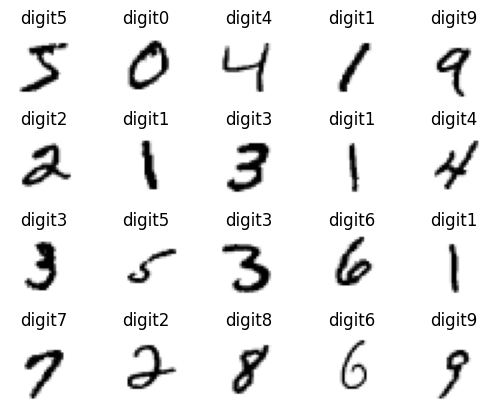

In [2]:
(train_img,img_labels), (test_img, test_labels) = mnist.load_data()
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(train_img[i], cmap='gray_r')#to show image in plot use imshow
  plt.title('digit'+str(img_labels[i]))
  plt.subplots_adjust(hspace = 0.5)
  plt.axis('off')
plt.show()
#to normalize the dataset so that pixel values range between 0 and 1
train_img = train_img/255
test_img = test_img/255

In [3]:
# Reshape the data to be (number of samples, height, width, channels)
train_img = train_img.reshape(-1, 28, 28, 1)
test_img = test_img.reshape(-1, 28, 28, 1)


#2 LeNet-5 Model Implementation
* Build the LeNet-5 architecture:
 * Input layer: Accept 28x28 grayscale images.
 * Convolutional layer: 6 filters, kernel size 5x5, followed by tanh activation.
 * Pooling layer: 2x2 max pooling.
 * Second convolutional layer: 16 filters, kernel size 5x5, followed by tanh activation.
 * Second pooling layer: 2x2 max pooling.
 * Flatten layer: to reshape the data into a vector.
 * Fully connected layer: 120 units, followed by tanh.
 * Second fully connected layer: 84 units, followed by tanh.
 * Output layer: 1O units (one per digit), followed by softmax activation.

In [4]:
# Build the LeNet-5 architecture:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

# 3: Training the Model
* Compile the model with the following configurations:
 * Loss function: sparse_categorical_crossentropy.
 * Optimizer: adam or sgd.
 * Metrics: accuracy.
* Train the model using the training data for 20 epochs with a batch size of 32.
* Use early stopping to stop if the training loss does not improve for a long time.
* Evaluate the model on the test set.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping here#Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Use either validation_data or validation_split
history = model.fit(train_img, img_labels, epochs=20, batch_size=32,validation_data=(test_img, test_labels))  # or validation_split=0.2

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_img, test_labels)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.8922 - loss: 0.3571 - val_accuracy: 0.9785 - val_loss: 0.0654
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 21ms/step - accuracy: 0.9807 - loss: 0.0625 - val_accuracy: 0.9859 - val_loss: 0.0430
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.9869 - loss: 0.0420 - val_accuracy: 0.9837 - val_loss: 0.0491
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 17ms/step - accuracy: 0.9911 - loss: 0.0294 - val_accuracy: 0.9872 - val_loss: 0.0421
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9931 - loss: 0.0224 - val_accuracy: 0.9895 - val_loss: 0.0359
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9941 - loss: 0.0189 - val_accuracy: 0.9861 - val_loss: 0.0431
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9953 - loss: 0.0150 - val_accuracy: 0.9884 - val_loss: 0.0366
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9958 -

#4: Analyzing Results
* Plot training and validation accuracy/loss graphs for the epochs.  
* Find the accuracy and loss on the test dataset.
* Generate the classification report for the test dataset.
* Visualize predictions for 1O randomly chosen test images and compare them with their actual labels.

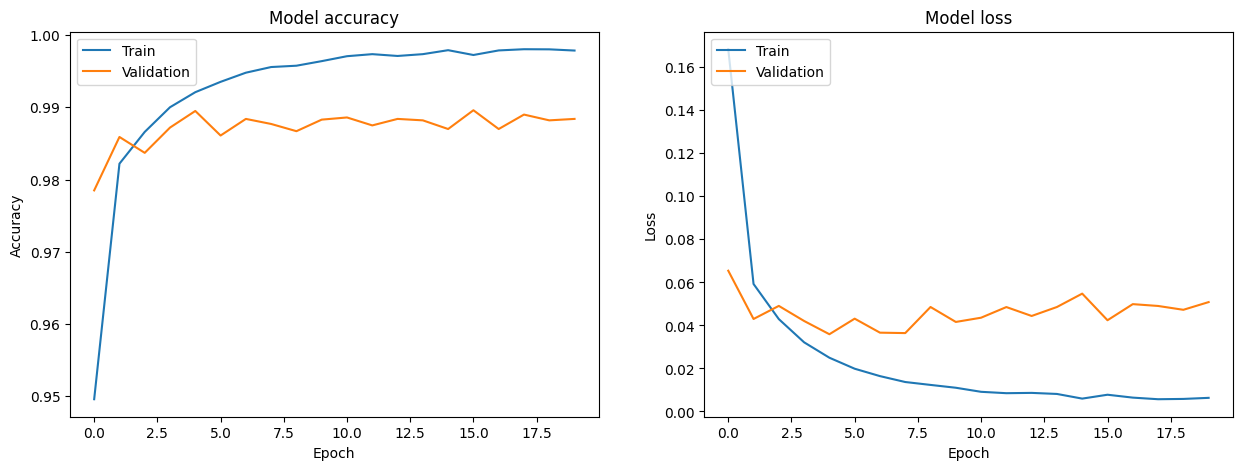

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



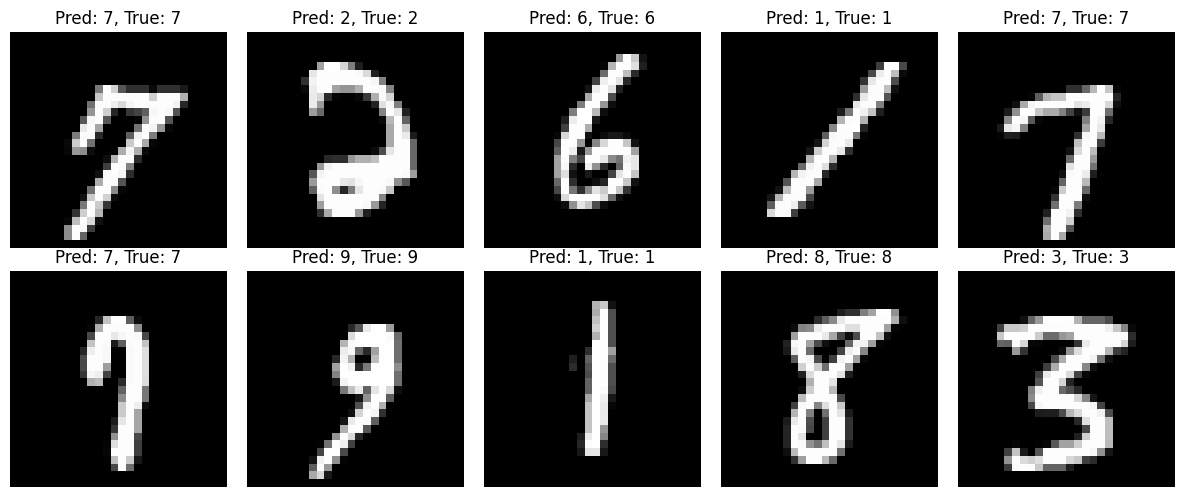

In [8]:
# Import the classification_report function
from sklearn.metrics import classification_report # Importing classification_report here


# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation accuracy values on the first subplot
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values on the second subplot
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')

# Display the figure with both subplots
plt.show()


# Generate classification report
y_pred = model.predict(test_img)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(test_labels, y_pred_classes))

# Visualize predictions for 10 random test images
import random
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

random_indices = random.sample(range(len(test_img)), 10)

for i, index in enumerate(random_indices):
    axes[i].imshow(test_img[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {y_pred_classes[index]}, True: {test_labels[index]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()